<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span><ul class="toc-item"><li><span><a href="#Эксперимент--проверки-оценки-качества-моделей" data-toc-modified-id="Эксперимент--проверки-оценки-качества-моделей-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Эксперимент  проверки оценки качества моделей</a></span></li><li><span><a href="#Вывод-по-результатам-эксперимента" data-toc-modified-id="Вывод-по-результатам-эксперимента-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Вывод по результатам эксперимента</a></span></li></ul></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.  

**Описание данных**  

Признаки: пол, возраст и зарплата застрахованного, количество членов его семьи.  
Целевой признак: количество страховых выплат клиенту за последние 5 лет.

## Загрузка данных

In [1]:
# Импорт библиотек.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

# Импорт модулей numpy.
from numpy.linalg import inv,det
from numpy.random import RandomState

# Импорт модулей IPython.
from IPython.core.display import display, HTML
from IPython.display import display_html
from IPython.display import display, Math, Latex

# Импорт моделей, модулей и метрик sklearn.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
try:
    insurance = pd.read_csv('/datasets/insurance.csv',sep=',')
    pd.set_option('display.max_columns', None)
    pd.options.mode.chained_assignment = None
except:
    insurance = pd.read_csv('insurance.csv',sep=',')
    pd.set_option('display.max_columns', None)
    pd.options.mode.chained_assignment = None

In [3]:
def info_row(df):
    '''
        Input: df - таблица pd.DataFrame.
        Output: None.
        Description: Функция первичного знакомства с данными.

    '''
    display(df.head(10))
    print('Общая информация:')
    display(df.info())
    print('Общая статистика:')
    display(df.describe())
    print('Дубликаты:')
    display(df.duplicated().sum())
    print(f'{df.duplicated().sum()/len(df):.1%}')
    print('Пропуски:')
    for col in df.columns:
        pct_missing = np.mean(df[col].isna())
        print('{} - {}%'.format(col, round(pct_missing*100,2)))
    print('Уникальные значения столбцов:')
    for row in df.columns:
        print('Уникальные значения столбца', row)
        print(df[row].unique())
    print('Матрица диаграмм:')
    pd.plotting.scatter_matrix(df,figsize=(10,10))
    plt.suptitle("Матрица диаграмм зависимостей", size=20)
    plt.show()
    print('Heatmap корреляций:')
    plt.figure(figsize=(10, 10))
    heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True,cmap='BrBG') 
    heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':10}, pad=12);
    plt.show()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
5,1,43.0,41000.0,2,1
6,1,39.0,39700.0,2,0
7,1,25.0,38600.0,4,0
8,1,36.0,49700.0,1,0
9,1,32.0,51700.0,1,0


Общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


None

Общая статистика:


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


Дубликаты:


153

3.1%
Пропуски:
Пол - 0.0%
Возраст - 0.0%
Зарплата - 0.0%
Члены семьи - 0.0%
Страховые выплаты - 0.0%
Уникальные значения столбцов:
Уникальные значения столбца Пол
[1 0]
Уникальные значения столбца Возраст
[41. 46. 29. 21. 28. 43. 39. 25. 36. 32. 38. 23. 40. 34. 26. 42. 27. 33.
 47. 30. 19. 31. 22. 20. 24. 18. 37. 48. 45. 44. 52. 49. 35. 56. 65. 55.
 57. 54. 50. 53. 51. 58. 59. 60. 61. 62.]
Уникальные значения столбца Зарплата
[49600. 38000. 21000. 41700. 26100. 41000. 39700. 38600. 49700. 51700.
 36600. 29300. 39500. 55000. 43700. 23300. 48900. 33200. 36900. 43500.
 36100. 26600. 48700. 40400. 38400. 34600. 34800. 36800. 42200. 46300.
 30300. 51000. 28100. 64800. 30400. 45300. 38300. 49500. 19400. 40200.
 31700. 69200. 33100. 31600. 34500. 38700. 39600. 42400. 34900. 30500.
 24200. 49900. 14300. 47000. 44800. 43800. 42700. 35400. 57200. 29600.
 37400. 48100. 33700. 61800. 39400. 15600. 52600. 37600. 52500. 32700.
 51600. 60900. 41800. 47400. 26500. 45900. 35700. 34300. 26700. 25700.
 3

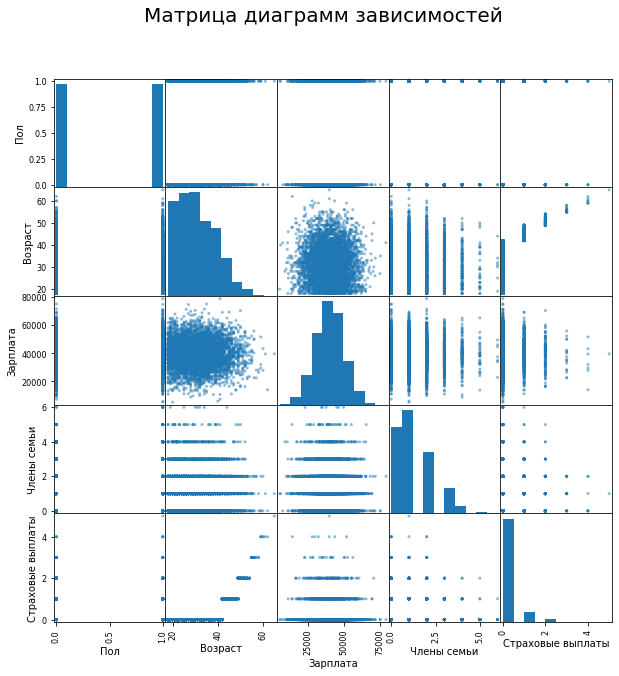

Heatmap корреляций:


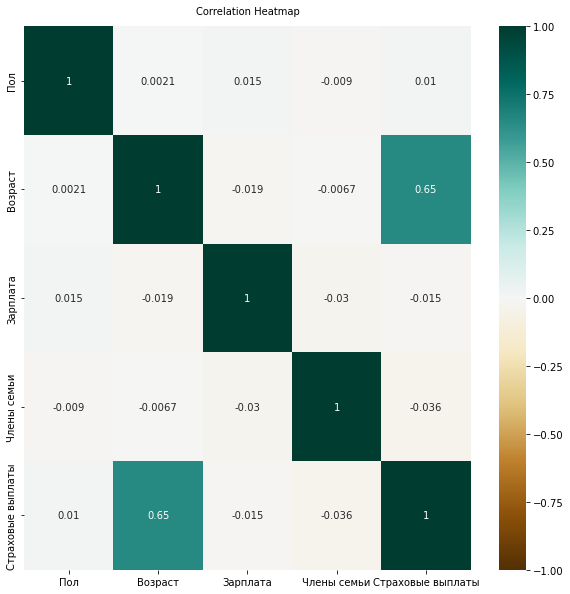

In [4]:
info_row(insurance)

In [5]:
def drop_dup(df):
    '''
        Input: df - таблица pd.DataFrame
        Output: None
        Description: Функция удаляет дубликаты, оставляя первое вхождение.

        '''
    df.drop_duplicates(inplace=True, ignore_index=False)
    df.reset_index(drop=True)
drop_dup(insurance)

### Вывод
- Предоставленный датасет имеет 4 столбца признаков (Пол, Возраст и Зарплата , Члены семьи)  
- Один целевой признак Страховые выплаты  
- Размер данных - 5000 строк
- В данных имеются дубликаты в количестве 153 строки(были удалены)
- Так же целочисленные данные в столбцах Возраст и Зарплата имеют тип float (для нашей задачи данный недочет не критичен)
- Сильной корреляции меджу признаками и целевым признаком не прослеживается

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)  
a. Изменится. Приведите примеры матриц.  
b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$  
  
**Постараемся посмотреть процесс на примере.**  
- Разобьем наши данные на признаки и целевой признак;  
- Создадим обратимую матрицу и просчитаем оба варианта(без умножения на обратимую матрицу и с учетом умножения);  
- В заключении, сравнив значения `R2`, полученного для каждого из случаев.

### Эксперимент  проверки оценки качества моделей

In [6]:
feathers = insurance.drop('Страховые выплаты', axis=1)
target = insurance['Страховые выплаты']

# Разбили выборку на признаки и целевой признак 'Страховые выплаты'.

In [7]:
def quality_control(feathers,target,color):
    '''
    Input: feathers - таблица признаков (pd.DataFrame), целевой признак (pd.Series), color - цвет вывода (str).
    Output: None
    Description: 1) Функция добавляет единичный столбец в матрицу признаков Х для применения 
                 сокращённой запись формулы линейной регрессии.  
                 2) Обучает две модели:
                     - по полученным признакам
                     - по признакам, домноженным на обратимую матрицу
                 3) Выводит качество получившихся предсказаний для наглядного сравнения.

    '''
    X = np.concatenate((np.ones((feathers.shape[0], 1)), feathers), axis=1)
    y = target
    r2_list = []
    index_list = ['До преобразования', 'После преобразования']
    
    for i in range(2):
        if i == 0:
            w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
            a = X.dot(w)
            r2 = r2_score(y, a)
            r2_list.append(r2)
        elif i == 1:
            P = np.random.normal(size=(X.shape[1] ,X.shape[1]))
            if np.linalg.det(P) != 0:
                XP = X.dot(P)
                w_XP = np.linalg.inv(XP.T.dot(XP)).dot(XP.T).dot(y)
                a_XP = XP.dot(w_XP)
                r2_XP = r2_score(y, a_XP)
                r2_list.append(r2_XP)
            else:
                print('Созданная матрица - не обратимая.')

    r2_df = pd.DataFrame(np.array(r2_list), index=[index_list], columns=['Коэффициент детерминации r2'])
    display(r2_df)   

In [8]:
quality_control(feathers,target,'blue')

,Коэффициент детерминации r2
До преобразования,0.430201
После преобразования,0.430201


### Вывод по результатам эксперимента
Что же, коэффициенты оценок качества модели и модели, умноженной на обратимую матрицу - **идентичны**.  
Теперь осталось это доказать.

**Ответ:**    **<span style="text-decoration: underline">Не изменится.</span>**

**Обоснование:**   
  
Умножим признаки Х на обратимую матрицу Р и подставим эти данные в формулу обучения линейной регрессии.

Таким образом, измененная формула обучения, будет выглядеть так:

$$
w_{XP} = ((XP)^T (XP))^{-1} (XP)^T y
$$

Где $XP$ - произведение признаков Х на обратимую матрицу Р.  
  
  Тогда формула предсказания будет выглядеть так:  
$$
a_{XP} = XPw_{XP}
$$

  
Матричные выражения имеют те же алгебраические приоритеты, что и числовые, плюс некоторые специфические матричные операции, такие, как **транспонирование** и **нахождение обратной матрицы**. В преобразовании получившейся формулы предсказания, нам понадобятся следующие свойства (каждое из них выделим соответствующим цветом, для наглядности):  
  
Одно из свойств **обратных матриц**:  
- Обратное значение произведения обратимых матриц A и B с одинаковым числом строк и столбцов будет равно значению, полученному при умножении матриц, обратных исходным, то есть: 
$$(\color{red}{\text{A}}B)^{-1}=B^{-1}\color{red}{\text{A}}^{-1} \; (\color{blue}{\text{свойство 1}}) $$      
  
Одно из свойств **транспонированных матриц**:  

- Транспонированное произведение матриц равно произведению транспонированных матриц, взятых в обратном порядке: 
$$(\color{red}{\text{A}}  B)^{T}= B^{T}  \color{red}{\text{A}}^{T} \; (\color{red}{\text{свойство 2}})$$  

Свойство **обратимых матриц**:  

- Произведение квадратной матрицы $A$ (в нашем случае  $P$) на ее обратимую матрицу $B$ ($P^{-1}$), равно единичной матрице $I_n$.  
$$\color{red}{\text{A}}B = B\color{red}{\text{A}} = I_n \; (\color{green}{\text{свойство 3}}) $$

Учитывая данные свойства, можно поэтапно переписать формулу предсказания:  
- Выводя транспонированные матрицы за скобки, применяем <font color='red'><b>(свойство 2)</b></font>:  
$$
a_{XP} = XP(\color{red}{\text{$(XP)^T$}} (XP))^{-1} \color{red}{\text{$(XP)^T$}} y\; \; \; \;\;     (1)
$$  
  
  
- Далее выводим за скобки обратимые матрицы Р согласно свойству (<font color='blue'><b>свойство 1</b></font>):

$$
a_{XP} = XP(\color{blue}{\text{$P^T$}} X^T X\color{blue}{\text{$P$}})^{-1} P^T X^T y\; \; \; \;\;\;      \;\;(2)  
$$  
  
- На выходе получаем произведение обратимых матриц <font color='green'><b>(свойство 3)</b></font> и избавляемся от единичной матрицы:  



$$
a_{XP} = X\color{green}{\text{$PP^{-1}$}}(X^TX)^{-1}\color{green}{\text{$(P^T)^{-1} P^T$}}X^T y\; \; \; \;\;\;\;     (3)
$$  

- В итоге, получаем формулу вывода предсказаний идентичную не перемноженной модели, подставив в конечное выражение $w$:

$$
a_{XP} = X \color{brown}{\text{$(X^TX)^{-1}X^T y$}}\; \Rightarrow \; a_{XP} = Xw\;\;\;\;\;\;      (6)
$$  
**Вывод:**  
<table style = "width:30%">
<tr>
<th>Предсказание</th>
<th>Формула</th>
</tr>
<tr>    
<td>До умножения</td>
<td>$a = Xw$</td>
</tr>
<tr>    
<td>После умножения</td>
<td>$a_{XP} = Xw$</td>
</tr>

## Алгоритм преобразования

**Алгоритм**


    
- Создайте квадратную, обратимую матрицу, размер которой соответствует количеству признаков обучающей выборки;<br>   
- Получаем новую обучающую выборку, путем умножения признаков на созданную обратимую матрицу  
    
    
   **Важные условия!**  
   - Определитель создаваемой обратимой матрицы не должен быть равен нулю (основное условие обратимости матрицы).
   - Размер содаваемой матрицы должен соответствовать количеству признаков обучаемой выборки, иначе умножение не возможно.

**Обоснование**  

Обоснование отсутствия потери в качестве линейной регрессии, при использовании данного метода шифрования данных клиентов, представлено выше и подтверждено экспериментом.

## Проверка алгоритма

In [9]:
def check_algorithm(feathers_tr,target_tr):
    '''
    Input: feathers - таблица признаков (pd.DataFrame), целевой признак (pd.Series).
    Output: r2_df - таблица коэффициентов детерминации r2 (pd.DataFrame)
    Description: 1) Функция осуществляет проверку изменения качества линейной регрессии до преобразования и после.  
                 2) Обучает две модели:
                     - по полученным признакам
                     - по признакам, домноженным на обратимую матрицу
                 3) Выводит качество получившихся предсказаний для наглядного сравнения.

    '''
    X = feathers_tr
    y = target_tr
    r2_list = []
    index_list = ['До преобразования', 'После преобразования']
    
    for i in range(2): 
        # Расчет модели и коэфициента r2 на непреобразованных данных.
        if i == 0:
            X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75,random_state=12345)
            model = LinearRegression()
            model.fit(X_train,y_train)
            predict = model.predict(X_test)
            
            r2 = r2_score(y_test,predict)
            r2_list.append(r2)
            
        elif i == 1:
            # Расчет модели и коэфициента r2 на преобразованных данных.
            P = np.random.normal(size=(X.shape[1] ,X.shape[1]))
            if np.linalg.det(P) != 0:
                # Проверка матрицы на обратимость сравнением ее определителя с нулем.    
                XP = X.dot(P)
                X_train_conv, X_test_conv, y_train_conv, y_test_conv = train_test_split(XP, y, 
                                                                                        train_size=0.75,random_state=12345)
                model_converted = LinearRegression()
                model_converted.fit(X_train_conv,y_train_conv)
                predict_converted = model_converted.predict(X_test_conv)
                
                r2_converted = r2_score(y_test_conv,predict_converted)
                r2_list.append(r2_converted)
            else:
                print('Созданная матрица - не обратимая.')
    
    r2_df = pd.DataFrame(np.array(r2_list), index=[index_list], columns=['Коэффициент детерминации r2'])
    return r2_df

    
    
    
    display(r2_df) 

In [10]:
check_algorithm(feathers,target)

,Коэффициент детерминации r2
До преобразования,0.423077
После преобразования,0.423077


### Вывод
>Разработанный метод преобразования данных, работает корректно, качество линейной регрессии идентично непреобразованным данным. Восстановить персональную информацию данных клиентов, не имея информации о методе преобразования и о ключ-матрице достаточно сложно.  
>Данные клиентов страховой компании «Хоть потоп» надежно защищены.